# CNN Model

In [1]:
import pandas as pd
import numpy as np

In [2]:
import yfinance as yf

ticker_symbol = 'JPM'

jpmorgan_data = yf.download(ticker_symbol, start='2013-01-01', end='2023-01-01')

print(jpmorgan_data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-01-02  44.980000  45.000000  44.220001  44.660000  32.691406  31413000
2013-01-03  44.740002  44.750000  44.200001  44.570000  32.625530  24227700
2013-01-04  44.450001  45.430000  44.439999  45.360001  33.203812  24487700
2013-01-07  45.090000  45.490002  45.020000  45.410000  33.240425  24456900
2013-01-08  45.400002  45.500000  44.959999  45.500000  33.306293  19624200


In [3]:
print(jpmorgan_data.index)

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=2518, freq=None)


In [4]:
jpmorgan_data.reset_index(inplace=True)

print(jpmorgan_data.head())

        Date       Open       High        Low      Close  Adj Close    Volume
0 2013-01-02  44.980000  45.000000  44.220001  44.660000  32.691406  31413000
1 2013-01-03  44.740002  44.750000  44.200001  44.570000  32.625530  24227700
2 2013-01-04  44.450001  45.430000  44.439999  45.360001  33.203812  24487700
3 2013-01-07  45.090000  45.490002  45.020000  45.410000  33.240425  24456900
4 2013-01-08  45.400002  45.500000  44.959999  45.500000  33.306293  19624200


In [7]:
jpmorgan_data['Date'] = pd.to_datetime(jpmorgan_data['Date'])
jpmorgan_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691406,31413000
1,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625530,24227700
2,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203812,24487700
3,2013-01-07,45.090000,45.490002,45.020000,45.410000,33.240425,24456900
4,2013-01-08,45.400002,45.500000,44.959999,45.500000,33.306293,19624200
...,...,...,...,...,...,...,...
2513,2022-12-23,130.580002,131.440002,129.639999,131.279999,125.963997,5091900
2514,2022-12-27,131.570007,132.220001,130.550003,131.740005,126.405388,5411000
2515,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096230,8827700
2516,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825447,6585200


In [8]:
date_range_start = '2013-01-01'
date_range_end = '2023-01-01'
full_date_range = pd.date_range(start=date_range_start, end=date_range_end)
date_range_df = pd.DataFrame(full_date_range, columns=['Date'])
jpmorgan_merged = pd.merge(date_range_df, jpmorgan_data, on='Date', how='left')
jpmorgan_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691406,31413000.0
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625530,24227700.0
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203812,24487700.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096230,8827700.0
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825447,6585200.0
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,128.669815,9292500.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
financial_metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for metric in financial_metrics:
    jpmorgan_merged[metric].interpolate(method='linear', inplace=True)

jpmorgan_merged.bfill(inplace=True)
jpmorgan_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,44.980000,45.000000,44.220001,44.660000,32.691406,3.141300e+07
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691406,3.141300e+07
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625530,2.422770e+07
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203812,2.448770e+07
4,2013-01-05,44.663334,45.450001,44.633333,45.376667,33.216016,2.447743e+07
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096230,8.827700e+06
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825447,6.585200e+06
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06
3651,2022-12-31,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06


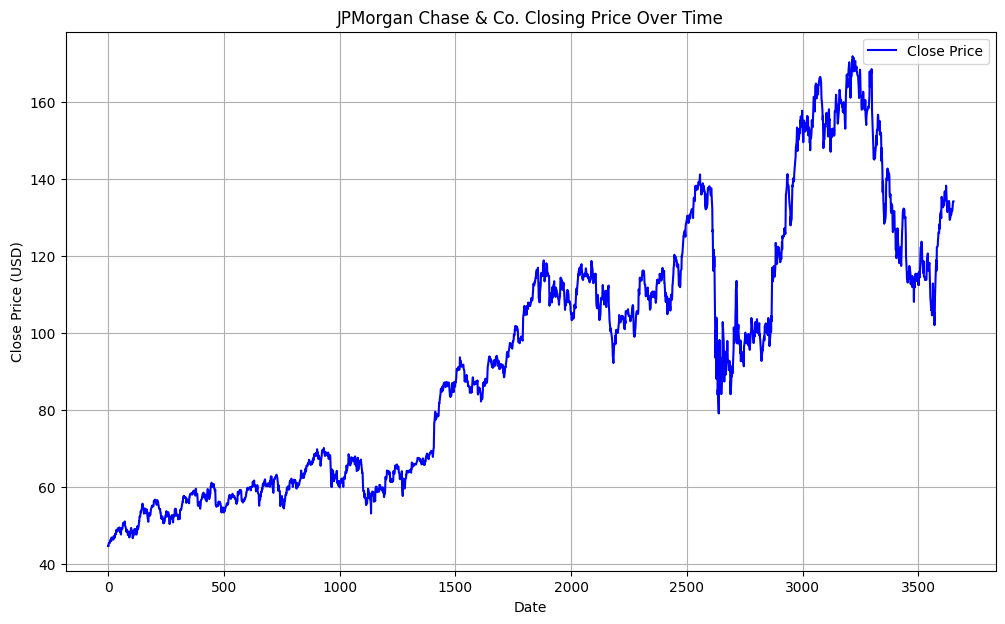

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(jpmorgan_merged['Close'], label='Close Price', color='blue')
plt.title('JPMorgan Chase & Co. Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [11]:
# # Calculate Turnover
# jpmorgan_merged['Turnover'] = (jpmorgan_merged['High'] + jpmorgan_merged['Low']) / 2 * jpmorgan_merged['Volume']

# # Calculate Daily Change and Percentage Change
jpmorgan_merged['Ups and downs'] = jpmorgan_merged['Close'].diff()
jpmorgan_merged['Percentage Change'] = jpmorgan_merged['Close'].pct_change()
# jpmorgan_merged['Percentage Change'] = jpmorgan_merged['Daily Change'] / jpmorgan_merged['Close'].shift(1) * 100

# # Calculate Ups and Downs
# jpmorgan_merged['Ups'] = jpmorgan_merged['Daily Change'].apply(lambda x: 1 if x > 0 else 0)
# jpmorgan_merged['Downs'] = jpmorgan_merged['Daily Change'].apply(lambda x: 1 if x < 0 else 0)

# # Display the updated DataFrame
jpmorgan_merged

,Date,Open,High,Low,Close,Adj Close,Volume,Ups and downs,Percentage Change
0,2013-01-01,44.980000,45.000000,44.220001,44.660000,32.691406,3.141300e+07,NaN,NaN
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691406,3.141300e+07,0.000000,0.000000
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625530,2.422770e+07,-0.090000,-0.002015
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203812,2.448770e+07,0.790001,0.017725
4,2013-01-05,44.663334,45.450001,44.633333,45.376667,33.216016,2.447743e+07,0.016666,0.000367
...,...,...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096230,8.827700e+06,0.720001,0.005465
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825447,6.585200e+06,0.759995,0.005738
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06,0.880005,0.006606
3651,2022-12-31,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06,0.000000,0.000000


In [12]:
columns = ['Ups and downs','Percentage Change']

for column in columns:
    jpmorgan_merged[column].interpolate(method='linear', inplace=True)
jpmorgan_merged.bfill(inplace=True)
jpmorgan_merged

,Date,Open,High,Low,Close,Adj Close,Volume,Ups and downs,Percentage Change
0,2013-01-01,44.980000,45.000000,44.220001,44.660000,32.691406,3.141300e+07,0.000000,0.000000
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691406,3.141300e+07,0.000000,0.000000
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625530,2.422770e+07,-0.090000,-0.002015
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203812,2.448770e+07,0.790001,0.017725
4,2013-01-05,44.663334,45.450001,44.633333,45.376667,33.216016,2.447743e+07,0.016666,0.000367
...,...,...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096230,8.827700e+06,0.720001,0.005465
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825447,6.585200e+06,0.759995,0.005738
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06,0.880005,0.006606
3651,2022-12-31,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06,0.000000,0.000000


In [ ]:
# # Moving Averages
# jpmorgan_merged['MA10'] = jpmorgan_merged['Close'].rolling(window=10).mean()
# jpmorgan_merged['MA50'] = jpmorgan_merged['Close'].rolling(window=50).mean()

# # Exponential Moving Averages
# jpmorgan_merged['EMA12'] = jpmorgan_merged['Close'].ewm(span=12, adjust=False).mean()
# jpmorgan_merged['EMA26'] = jpmorgan_merged['Close'].ewm(span=26, adjust=False).mean()

# # # Calculate MACD
# # jpmorgan_merged['MACD'] = jpmorgan_merged['EMA12'] - jpmorgan_merged['EMA26']
# # jpmorgan_merged['Signal_Line'] = jpmorgan_merged['MACD'].ewm(span=9, adjust=False).mean()

# # # RSI Calculation
# # delta = jpmorgan_merged['Close'].diff(1)
# # gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
# # loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
# # RS = gain / loss
# # jpmorgan_merged['RSI'] = 100 - (100 / (1 + RS))
# jpmorgan_merged

In [ ]:
# columns = ['MA10','MA50','EMA12','EMA26']

# for column in columns:
#     jpmorgan_merged[column].interpolate(method='linear', inplace=True)
# jpmorgan_merged.bfill(inplace=True)
# jpmorgan_merged

In [14]:
features = jpmorgan_merged.drop(['Adj Close'], axis=1)
features.head()

,Date,Open,High,Low,Close,Volume,Ups and downs,Percentage Change
0,2013-01-01,44.980000,45.000000,44.220001,44.660000,3.141300e+07,0.000000,0.000000
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,3.141300e+07,0.000000,0.000000
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,2.422770e+07,-0.090000,-0.002015
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,2.448770e+07,0.790001,0.017725
4,2013-01-05,44.663334,45.450001,44.633333,45.376667,2.447743e+07,0.016666,0.000367


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

features = jpmorgan_merged.drop(['Date','Adj Close'], axis=1)
target = jpmorgan_merged['Close']

In [ ]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1,1))
features_scaled.shape, target_scaled.shape

((3653, 7), (3653, 1))

In [ ]:
def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X, y = create_dataset(features_scaled, target_scaled, time_steps)

In [ ]:
X.shape, y.shape

((3643, 10, 7), (3643, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3278, 10, 7)
(365, 10, 7)
(3278, 1)
(365, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2]), padding='same'))
model.add(MaxPooling1D(pool_size=1, padding='same'))
# Flatten the convolution output to feed it into a dense layer
model.add(Flatten())
# Output layer
model.add(Dense(units=1))   # Assuming a regression problem

model.compile(optimizer = 'adam', loss = 'mse' , metrics=['mean_absolute_error'])

# Print the model summary to review its architecture
model.summary()

C:\Users\Timch\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 10, 32)              │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             321 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=2, validation_split=0.1)

Epoch 1/50
47/47 - 1s - 24ms/step - loss: 0.0042 - mean_absolute_error: 0.0438 - val_loss: 0.0017 - val_mean_absolute_error: 0.0346
Epoch 2/50
47/47 - 0s - 2ms/step - loss: 5.8473e-04 - mean_absolute_error: 0.0171 - val_loss: 0.0019 - val_mean_absolute_error: 0.0382
Epoch 3/50
47/47 - 0s - 2ms/step - loss: 3.3272e-04 - mean_absolute_error: 0.0130 - val_loss: 8.3207e-04 - val_mean_absolute_error: 0.0248
Epoch 4/50
47/47 - 0s - 2ms/step - loss: 2.7009e-04 - mean_absolute_error: 0.0114 - val_loss: 4.0705e-04 - val_mean_absolute_error: 0.0165
Epoch 5/50
47/47 - 0s - 2ms/step - loss: 2.2987e-04 - mean_absolute_error: 0.0106 - val_loss: 7.9648e-04 - val_mean_absolute_error: 0.0243
Epoch 6/50
47/47 - 0s - 2ms/step - loss: 1.8839e-04 - mean_absolute_error: 0.0096 - val_loss: 6.8474e-04 - val_mean_absolute_error: 0.0222
Epoch 7/50
47/47 - 0s - 3ms/step - loss: 1.7473e-04 - mean_absolute_error: 0.0090 - val_loss: 2.7780e-04 - val_mean_absolute_error: 0.0139
Epoch 8/50
47/47 - 0s - 3ms/step - los

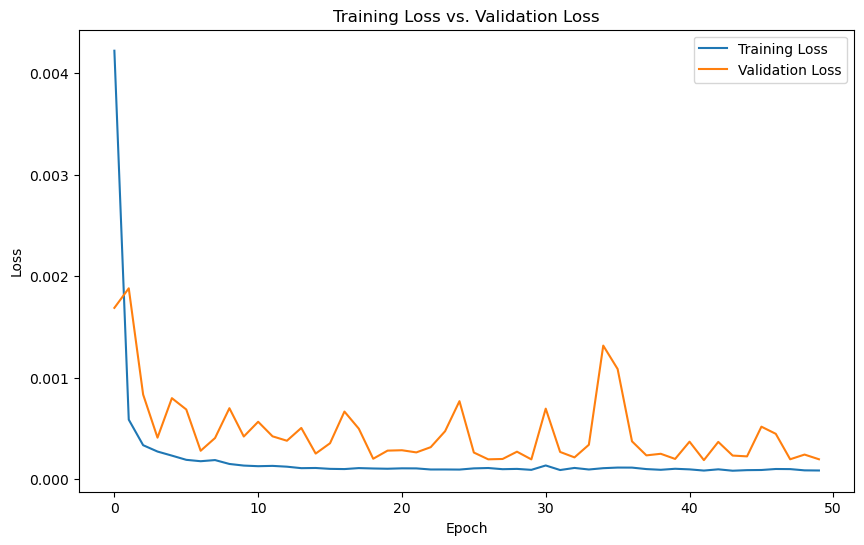

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred_actual = scaler.inverse_transform(train_pred)
train_actual = scaler.inverse_transform(y_train)
test_pred_actual = scaler.inverse_transform(test_pred)
test_actual = scaler.inverse_transform(y_test)

train_rmse = sqrt(mean_squared_error(train_actual, train_pred_actual))
train_mae = mean_absolute_error(train_actual, train_pred_actual)
train_mape = np.mean(np.abs((train_actual - train_pred_actual) / train_actual)) * 100

test_rmse = sqrt(mean_squared_error(test_actual, test_pred_actual))
test_mae = mean_absolute_error(test_actual, test_pred_actual)
test_mape = np.mean(np.abs((test_actual - test_pred_actual) / test_actual)) * 100

print('Train RMSE:', train_rmse)
print('Train MAE:', train_mae)
print('Train MAPE:', train_mape)
print('Test RMSE:', test_rmse)
print('Test MAE:', test_mae)
print('Test MAPE:', test_mape)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Train RMSE: 1.3790780077755556
Train MAE: 1.0059552732851293
Train MAPE: 1.1344817477553015
Test RMSE: 2.1658613917852367
Test MAE: 1.6538752412142819
Test MAPE: 1.3036311571769192


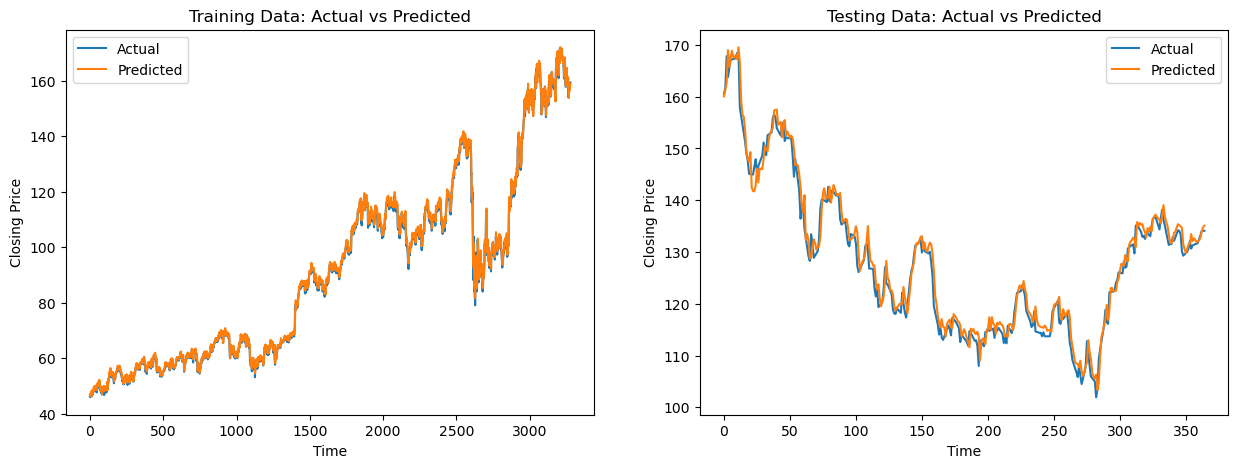

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_actual, label='Actual')
plt.plot(train_pred_actual, label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_actual, label='Actual')
plt.plot(test_pred_actual, label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.show()

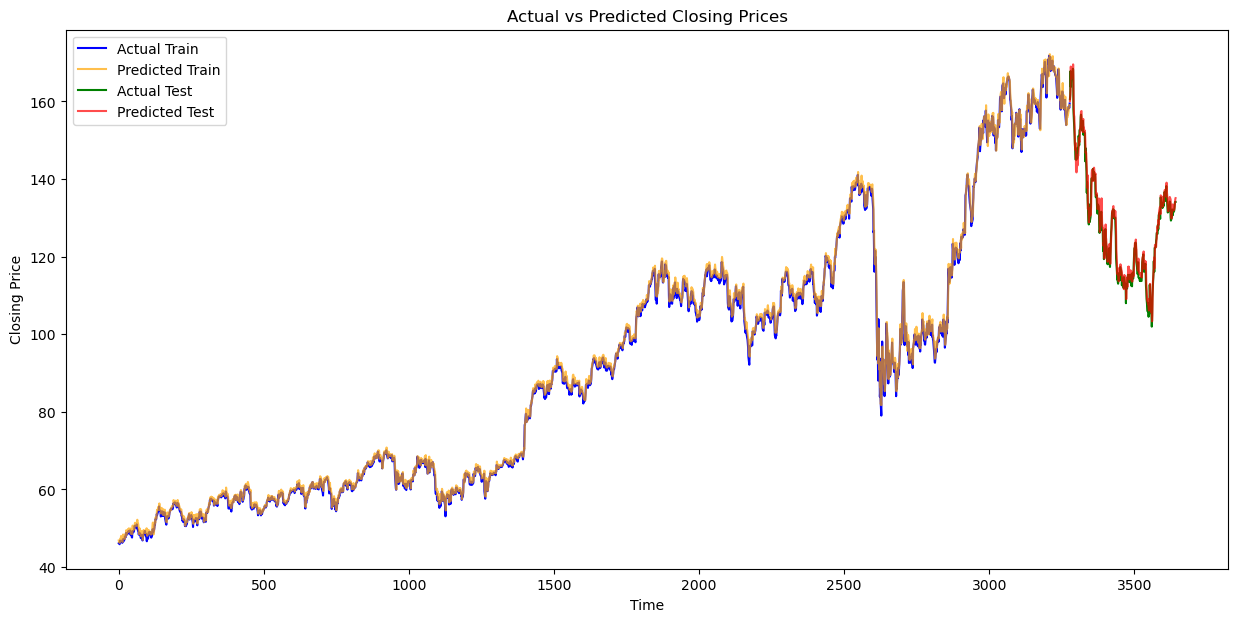

In [ ]:
import matplotlib.pyplot as plt

train_time = range(len(train_actual))
test_time = range(len(train_actual), len(train_actual) + len(test_actual))

plt.figure(figsize=(15, 7))
plt.plot(train_time, train_actual, label='Actual Train', color='blue')
plt.plot(train_time, train_pred_actual, label='Predicted Train', color='orange', alpha=0.7)
plt.plot(test_time, test_actual, label='Actual Test', color='green')
plt.plot(test_time, test_pred_actual, label='Predicted Test', color='red', alpha=0.7)

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# LSTM Model

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import yfinance as yf

ticker_symbol = 'JPM'

jpmorgan_data = yf.download(ticker_symbol, start='2013-01-01', end='2023-01-01')

print(jpmorgan_data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-01-02  44.980000  45.000000  44.220001  44.660000  32.691414  31413000
2013-01-03  44.740002  44.750000  44.200001  44.570000  32.625542  24227700
2013-01-04  44.450001  45.430000  44.439999  45.360001  33.203823  24487700
2013-01-07  45.090000  45.490002  45.020000  45.410000  33.240425  24456900
2013-01-08  45.400002  45.500000  44.959999  45.500000  33.306309  19624200


In [ ]:
print(jpmorgan_data.index)

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=2518, freq=None)


In [ ]:
jpmorgan_data.reset_index(inplace=True)

print(jpmorgan_data.head())

        Date       Open       High        Low      Close  Adj Close    Volume
0 2013-01-02  44.980000  45.000000  44.220001  44.660000  32.691414  31413000
1 2013-01-03  44.740002  44.750000  44.200001  44.570000  32.625542  24227700
2 2013-01-04  44.450001  45.430000  44.439999  45.360001  33.203823  24487700
3 2013-01-07  45.090000  45.490002  45.020000  45.410000  33.240425  24456900
4 2013-01-08  45.400002  45.500000  44.959999  45.500000  33.306309  19624200


In [ ]:
jpmorgan_data['Date'] = pd.to_datetime(jpmorgan_data['Date'])
jpmorgan_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691414,31413000
1,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625542,24227700
2,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203823,24487700
3,2013-01-07,45.090000,45.490002,45.020000,45.410000,33.240425,24456900
4,2013-01-08,45.400002,45.500000,44.959999,45.500000,33.306309,19624200
...,...,...,...,...,...,...,...
2513,2022-12-23,130.580002,131.440002,129.639999,131.279999,125.963982,5091900
2514,2022-12-27,131.570007,132.220001,130.550003,131.740005,126.405380,5411000
2515,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096222,8827700
2516,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825432,6585200


In [ ]:
date_range_start = '2013-01-01'
date_range_end = '2023-01-01'
full_date_range = pd.date_range(start=date_range_start, end=date_range_end)
date_range_df = pd.DataFrame(full_date_range, columns=['Date'])
jpmorgan_merged = pd.merge(date_range_df, jpmorgan_data, on='Date', how='left')
jpmorgan_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691414,31413000.0
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625542,24227700.0
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203823,24487700.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096222,8827700.0
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825432,6585200.0
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,128.669815,9292500.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
financial_metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for metric in financial_metrics:
    jpmorgan_merged[metric].interpolate(method='linear', inplace=True)

jpmorgan_merged.bfill(inplace=True)
jpmorgan_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,44.980000,45.000000,44.220001,44.660000,32.691414,3.141300e+07
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691414,3.141300e+07
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625542,2.422770e+07
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203823,2.448770e+07
4,2013-01-05,44.663334,45.450001,44.633333,45.376667,33.216024,2.447743e+07
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096222,8.827700e+06
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825432,6.585200e+06
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06
3651,2022-12-31,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06


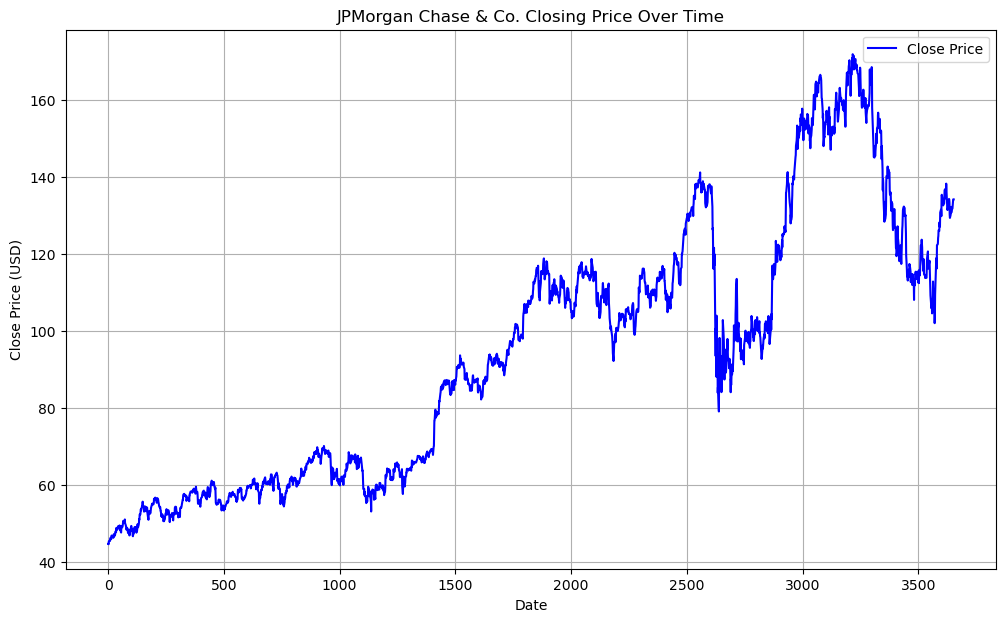

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(jpmorgan_merged['Close'], label='Close Price', color='blue')
plt.title('JPMorgan Chase & Co. Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# # Calculate Turnover
# jpmorgan_merged['Turnover'] = (jpmorgan_merged['High'] + jpmorgan_merged['Low']) / 2 * jpmorgan_merged['Volume']

# # Calculate Daily Change and Percentage Change
jpmorgan_merged['Ups and downs'] = jpmorgan_merged['Close'].diff()
jpmorgan_merged['Percentage Change'] = jpmorgan_merged['Close'].pct_change()
# jpmorgan_merged['Percentage Change'] = jpmorgan_merged['Daily Change'] / jpmorgan_merged['Close'].shift(1) * 100

# # Calculate Ups and Downs
# jpmorgan_merged['Ups'] = jpmorgan_merged['Daily Change'].apply(lambda x: 1 if x > 0 else 0)
# jpmorgan_merged['Downs'] = jpmorgan_merged['Daily Change'].apply(lambda x: 1 if x < 0 else 0)

# # Display the updated DataFrame
jpmorgan_merged

,Date,Open,High,Low,Close,Adj Close,Volume,Ups and downs,Percentage Change
0,2013-01-01,44.980000,45.000000,44.220001,44.660000,32.691414,3.141300e+07,NaN,NaN
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691414,3.141300e+07,0.000000,0.000000
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625542,2.422770e+07,-0.090000,-0.002015
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203823,2.448770e+07,0.790001,0.017725
4,2013-01-05,44.663334,45.450001,44.633333,45.376667,33.216024,2.447743e+07,0.016666,0.000367
...,...,...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096222,8.827700e+06,0.720001,0.005465
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825432,6.585200e+06,0.759995,0.005738
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06,0.880005,0.006606
3651,2022-12-31,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06,0.000000,0.000000


In [ ]:
columns = ['Ups and downs','Percentage Change']

for column in columns:
    jpmorgan_merged[column].interpolate(method='linear', inplace=True)
jpmorgan_merged.bfill(inplace=True)
jpmorgan_merged

,Date,Open,High,Low,Close,Adj Close,Volume,Ups and downs,Percentage Change
0,2013-01-01,44.980000,45.000000,44.220001,44.660000,32.691414,3.141300e+07,0.000000,0.000000
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691414,3.141300e+07,0.000000,0.000000
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625542,2.422770e+07,-0.090000,-0.002015
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203823,2.448770e+07,0.790001,0.017725
4,2013-01-05,44.663334,45.450001,44.633333,45.376667,33.216024,2.447743e+07,0.016666,0.000367
...,...,...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096222,8.827700e+06,0.720001,0.005465
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825432,6.585200e+06,0.759995,0.005738
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06,0.880005,0.006606
3651,2022-12-31,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06,0.000000,0.000000


In [ ]:
# # Moving Averages
# jpmorgan_merged['MA10'] = jpmorgan_merged['Close'].rolling(window=10).mean()
# jpmorgan_merged['MA50'] = jpmorgan_merged['Close'].rolling(window=50).mean()

# # Exponential Moving Averages
# jpmorgan_merged['EMA12'] = jpmorgan_merged['Close'].ewm(span=12, adjust=False).mean()
# jpmorgan_merged['EMA26'] = jpmorgan_merged['Close'].ewm(span=26, adjust=False).mean()

# # # Calculate MACD
# # jpmorgan_merged['MACD'] = jpmorgan_merged['EMA12'] - jpmorgan_merged['EMA26']
# # jpmorgan_merged['Signal_Line'] = jpmorgan_merged['MACD'].ewm(span=9, adjust=False).mean()

# # # RSI Calculation
# # delta = jpmorgan_merged['Close'].diff(1)
# # gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
# # loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
# # RS = gain / loss
# # jpmorgan_merged['RSI'] = 100 - (100 / (1 + RS))
# jpmorgan_merged

In [ ]:
# columns = ['MA10','MA50','EMA12','EMA26']

# for column in columns:
#     jpmorgan_merged[column].interpolate(method='linear', inplace=True)
# jpmorgan_merged.bfill(inplace=True)
# jpmorgan_merged

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

features = jpmorgan_merged.drop(['Date','Adj Close'], axis=1)
target = jpmorgan_merged['Close']

In [ ]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1,1))
features_scaled.shape, target_scaled.shape

((3653, 7), (3653, 1))

In [ ]:
def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X, y = create_dataset(features_scaled, target_scaled, time_steps)

In [ ]:
X.shape, y.shape

((3643, 10, 7), (3643, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3278, 10, 7)
(365, 10, 7)
(3278, 1)
(365, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()

model.add(LSTM(units=64, activation='tanh', input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=False))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mse' , metrics=['mean_absolute_error'])
model.summary()

C:\Users\Timch\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,497 (72.25 KB)

 Trainable params: 18,497 (72.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=2, validation_split=0.1)

Epoch 1/50
47/47 - 3s - 57ms/step - loss: 0.0255 - mean_absolute_error: 0.0981 - val_loss: 9.0981e-04 - val_mean_absolute_error: 0.0259
Epoch 2/50
47/47 - 0s - 5ms/step - loss: 4.0649e-04 - mean_absolute_error: 0.0145 - val_loss: 0.0021 - val_mean_absolute_error: 0.0408
Epoch 3/50
47/47 - 0s - 4ms/step - loss: 3.1255e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0018 - val_mean_absolute_error: 0.0375
Epoch 4/50
47/47 - 0s - 4ms/step - loss: 2.9516e-04 - mean_absolute_error: 0.0119 - val_loss: 0.0015 - val_mean_absolute_error: 0.0343
Epoch 5/50
47/47 - 0s - 4ms/step - loss: 2.7969e-04 - mean_absolute_error: 0.0115 - val_loss: 0.0012 - val_mean_absolute_error: 0.0302
Epoch 6/50
47/47 - 0s - 4ms/step - loss: 2.6950e-04 - mean_absolute_error: 0.0111 - val_loss: 0.0015 - val_mean_absolute_error: 0.0342
Epoch 7/50
47/47 - 0s - 5ms/step - loss: 2.5845e-04 - mean_absolute_error: 0.0108 - val_loss: 9.2519e-04 - val_mean_absolute_error: 0.0262
Epoch 8/50
47/47 - 0s - 4ms/step - loss: 2.5569e-0

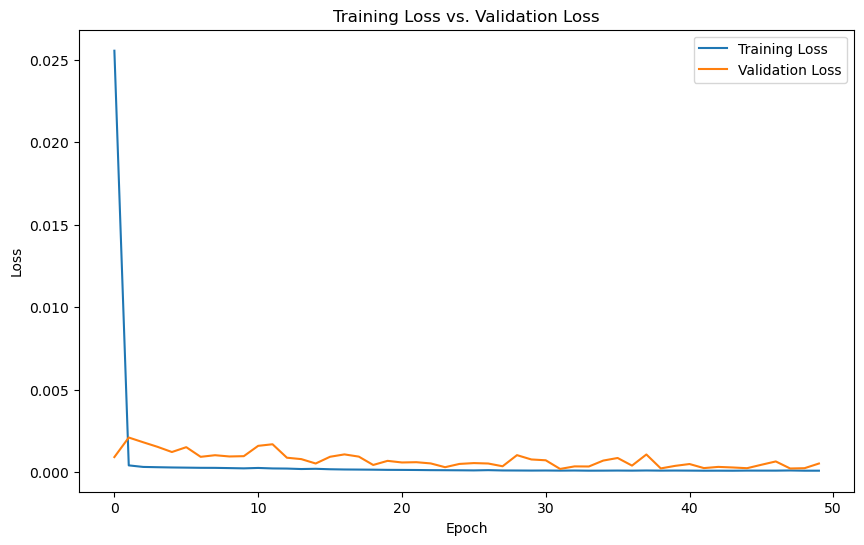

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred_actual = scaler.inverse_transform(train_pred)
train_actual = scaler.inverse_transform(y_train)
test_pred_actual = scaler.inverse_transform(test_pred)
test_actual = scaler.inverse_transform(y_test)

train_rmse = sqrt(mean_squared_error(train_actual, train_pred_actual))
train_mae = mean_absolute_error(train_actual, train_pred_actual)
train_mape = np.mean(np.abs((train_actual - train_pred_actual) / train_actual)) * 100

test_rmse = sqrt(mean_squared_error(test_actual, test_pred_actual))
test_mae = mean_absolute_error(test_actual, test_pred_actual)
test_mape = np.mean(np.abs((test_actual - test_pred_actual) / test_actual)) * 100

print('Train RMSE:', train_rmse)
print('Train MAE:', train_mae)
print('Train MAPE:', train_mape)
print('Test RMSE:', test_rmse)
print('Test MAE:', test_mae)
print('Test MAPE:', test_mape)

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train RMSE: 1.522482142623168
Train MAE: 1.0169885692398601
Train MAPE: 1.070951741310975
Test RMSE: 2.156221420727928
Test MAE: 1.6076084572430618
Test MAPE: 1.2307588334861663


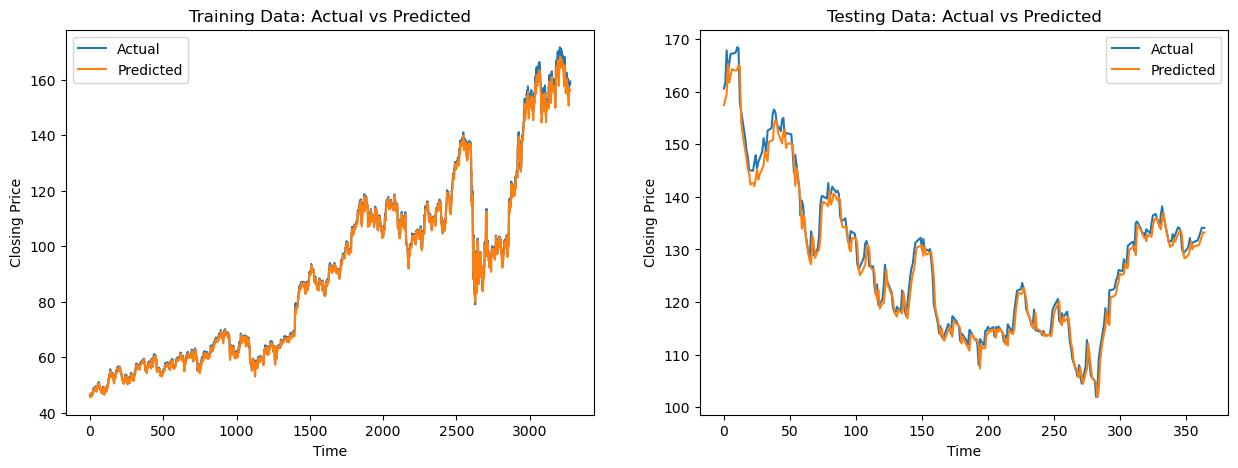

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_actual, label='Actual')
plt.plot(train_pred_actual, label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_actual, label='Actual')
plt.plot(test_pred_actual, label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.show()

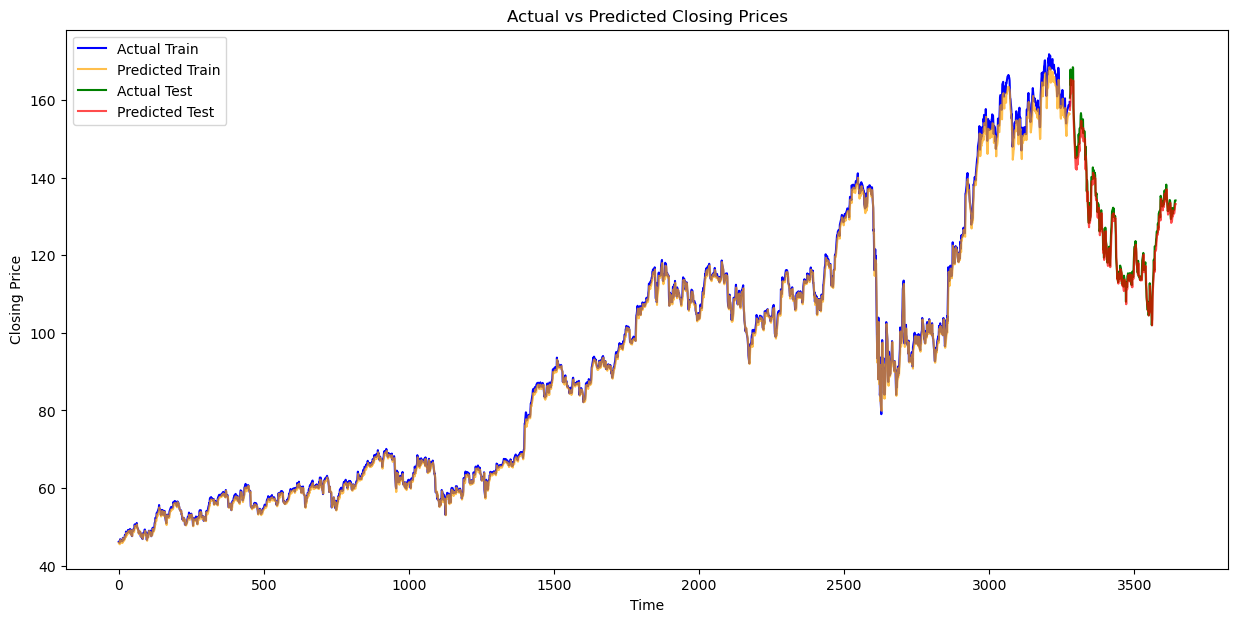

In [ ]:
import matplotlib.pyplot as plt

train_time = range(len(train_actual))
test_time = range(len(train_actual), len(train_actual) + len(test_actual))

plt.figure(figsize=(15, 7))
plt.plot(train_time, train_actual, label='Actual Train', color='blue')
plt.plot(train_time, train_pred_actual, label='Predicted Train', color='orange', alpha=0.7)
plt.plot(test_time, test_actual, label='Actual Test', color='green')
plt.plot(test_time, test_pred_actual, label='Predicted Test', color='red', alpha=0.7)

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# CNN-LSTM Model

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import yfinance as yf

ticker_symbol = 'JPM'

jpmorgan_data = yf.download(ticker_symbol, start='2013-01-01', end='2023-01-01')

print(jpmorgan_data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-01-02  44.980000  45.000000  44.220001  44.660000  32.691414  31413000
2013-01-03  44.740002  44.750000  44.200001  44.570000  32.625542  24227700
2013-01-04  44.450001  45.430000  44.439999  45.360001  33.203823  24487700
2013-01-07  45.090000  45.490002  45.020000  45.410000  33.240425  24456900
2013-01-08  45.400002  45.500000  44.959999  45.500000  33.306309  19624200


In [ ]:
print(jpmorgan_data.index)

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=2518, freq=None)


In [ ]:
jpmorgan_data.reset_index(inplace=True)

print(jpmorgan_data.head())

        Date       Open       High        Low      Close  Adj Close    Volume
0 2013-01-02  44.980000  45.000000  44.220001  44.660000  32.691414  31413000
1 2013-01-03  44.740002  44.750000  44.200001  44.570000  32.625542  24227700
2 2013-01-04  44.450001  45.430000  44.439999  45.360001  33.203823  24487700
3 2013-01-07  45.090000  45.490002  45.020000  45.410000  33.240425  24456900
4 2013-01-08  45.400002  45.500000  44.959999  45.500000  33.306309  19624200


In [ ]:
jpmorgan_data['Date'] = pd.to_datetime(jpmorgan_data['Date'])
jpmorgan_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691414,31413000
1,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625542,24227700
2,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203823,24487700
3,2013-01-07,45.090000,45.490002,45.020000,45.410000,33.240425,24456900
4,2013-01-08,45.400002,45.500000,44.959999,45.500000,33.306309,19624200
...,...,...,...,...,...,...,...
2513,2022-12-23,130.580002,131.440002,129.639999,131.279999,125.963982,5091900
2514,2022-12-27,131.570007,132.220001,130.550003,131.740005,126.405380,5411000
2515,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096222,8827700
2516,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825432,6585200


In [ ]:
date_range_start = '2013-01-01'
date_range_end = '2023-01-01'
full_date_range = pd.date_range(start=date_range_start, end=date_range_end)
date_range_df = pd.DataFrame(full_date_range, columns=['Date'])
jpmorgan_merged = pd.merge(date_range_df, jpmorgan_data, on='Date', how='left')
jpmorgan_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691414,31413000.0
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625542,24227700.0
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203823,24487700.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096222,8827700.0
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825432,6585200.0
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,128.669815,9292500.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
financial_metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for metric in financial_metrics:
    jpmorgan_merged[metric].interpolate(method='linear', inplace=True)

jpmorgan_merged.bfill(inplace=True)
jpmorgan_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,44.980000,45.000000,44.220001,44.660000,32.691414,3.141300e+07
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691414,3.141300e+07
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625542,2.422770e+07
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203823,2.448770e+07
4,2013-01-05,44.663334,45.450001,44.633333,45.376667,33.216024,2.447743e+07
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096222,8.827700e+06
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825432,6.585200e+06
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06
3651,2022-12-31,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06


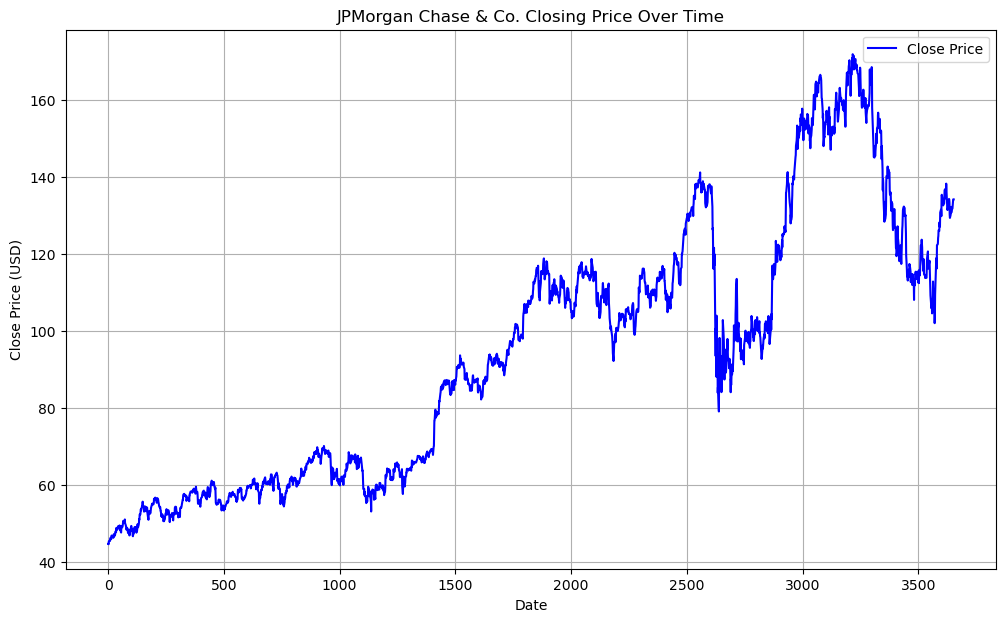

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(jpmorgan_merged['Close'], label='Close Price', color='blue')
plt.title('JPMorgan Chase & Co. Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# # Calculate Turnover
# jpmorgan_merged['Turnover'] = (jpmorgan_merged['High'] + jpmorgan_merged['Low']) / 2 * jpmorgan_merged['Volume']

# # Calculate Daily Change and Percentage Change
jpmorgan_merged['Ups and downs'] = jpmorgan_merged['Close'].diff()
jpmorgan_merged['Percentage Change'] = jpmorgan_merged['Close'].pct_change()
# jpmorgan_merged['Percentage Change'] = jpmorgan_merged['Daily Change'] / jpmorgan_merged['Close'].shift(1) * 100

# # Calculate Ups and Downs
# jpmorgan_merged['Ups'] = jpmorgan_merged['Daily Change'].apply(lambda x: 1 if x > 0 else 0)
# jpmorgan_merged['Downs'] = jpmorgan_merged['Daily Change'].apply(lambda x: 1 if x < 0 else 0)

# # Display the updated DataFrame
jpmorgan_merged

,Date,Open,High,Low,Close,Adj Close,Volume,Ups and downs,Percentage Change
0,2013-01-01,44.980000,45.000000,44.220001,44.660000,32.691414,3.141300e+07,NaN,NaN
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691414,3.141300e+07,0.000000,0.000000
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625542,2.422770e+07,-0.090000,-0.002015
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203823,2.448770e+07,0.790001,0.017725
4,2013-01-05,44.663334,45.450001,44.633333,45.376667,33.216024,2.447743e+07,0.016666,0.000367
...,...,...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096222,8.827700e+06,0.720001,0.005465
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825432,6.585200e+06,0.759995,0.005738
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06,0.880005,0.006606
3651,2022-12-31,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06,0.000000,0.000000


In [ ]:
columns = ['Ups and downs','Percentage Change']

for column in columns:
    jpmorgan_merged[column].interpolate(method='linear', inplace=True)
jpmorgan_merged.bfill(inplace=True)
jpmorgan_merged

,Date,Open,High,Low,Close,Adj Close,Volume,Ups and downs,Percentage Change
0,2013-01-01,44.980000,45.000000,44.220001,44.660000,32.691414,3.141300e+07,0.000000,0.000000
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691414,3.141300e+07,0.000000,0.000000
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625542,2.422770e+07,-0.090000,-0.002015
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203823,2.448770e+07,0.790001,0.017725
4,2013-01-05,44.663334,45.450001,44.633333,45.376667,33.216024,2.447743e+07,0.016666,0.000367
...,...,...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096222,8.827700e+06,0.720001,0.005465
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825432,6.585200e+06,0.759995,0.005738
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06,0.880005,0.006606
3651,2022-12-31,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06,0.000000,0.000000


In [ ]:
# # Moving Averages
# jpmorgan_merged['MA10'] = jpmorgan_merged['Close'].rolling(window=10).mean()
# jpmorgan_merged['MA50'] = jpmorgan_merged['Close'].rolling(window=50).mean()

# # Exponential Moving Averages
# jpmorgan_merged['EMA12'] = jpmorgan_merged['Close'].ewm(span=12, adjust=False).mean()
# jpmorgan_merged['EMA26'] = jpmorgan_merged['Close'].ewm(span=26, adjust=False).mean()

# # # Calculate MACD
# # jpmorgan_merged['MACD'] = jpmorgan_merged['EMA12'] - jpmorgan_merged['EMA26']
# # jpmorgan_merged['Signal_Line'] = jpmorgan_merged['MACD'].ewm(span=9, adjust=False).mean()

# # # RSI Calculation
# # delta = jpmorgan_merged['Close'].diff(1)
# # gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
# # loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
# # RS = gain / loss
# # jpmorgan_merged['RSI'] = 100 - (100 / (1 + RS))
# jpmorgan_merged

In [ ]:
# columns = ['MA10','MA50','EMA12','EMA26']

# for column in columns:
#     jpmorgan_merged[column].interpolate(method='linear', inplace=True)
# jpmorgan_merged.bfill(inplace=True)
# jpmorgan_merged

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

features = jpmorgan_merged.drop(['Date','Adj Close'], axis=1)
target = jpmorgan_merged['Close']

In [ ]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1,1))
features_scaled.shape, target_scaled.shape

((3653, 7), (3653, 1))

In [ ]:
def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X, y = create_dataset(features_scaled, target_scaled, time_steps)

In [ ]:
X.shape, y.shape

((3643, 10, 7), (3643, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3278, 10, 7)
(365, 10, 7)
(3278, 1)
(365, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Dropout, BatchNormalization, Bidirectional, TimeDistributed, Flatten

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2]), padding='same'))
model.add(MaxPooling1D(pool_size=1, padding='same'))

# model.add((Flatten()))

# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=1, padding='same'))
model.add(LSTM(units=64, return_sequences=False, activation='tanh'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])

# Model summary to see the architecture
model.summary()

C:\Users\Timch\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 10, 32)              │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,601 (100.00 KB)

 Trainable params: 25,601 (100.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=2, validation_split=0.1)

Epoch 1/50
47/47 - 3s - 62ms/step - loss: 0.0154 - mean_absolute_error: 0.0835 - val_loss: 0.0017 - val_mean_absolute_error: 0.0372
Epoch 2/50
47/47 - 0s - 5ms/step - loss: 3.1634e-04 - mean_absolute_error: 0.0128 - val_loss: 7.0236e-04 - val_mean_absolute_error: 0.0231
Epoch 3/50
47/47 - 0s - 5ms/step - loss: 2.1619e-04 - mean_absolute_error: 0.0102 - val_loss: 3.5398e-04 - val_mean_absolute_error: 0.0156
Epoch 4/50
47/47 - 0s - 5ms/step - loss: 2.0889e-04 - mean_absolute_error: 0.0098 - val_loss: 2.6302e-04 - val_mean_absolute_error: 0.0136
Epoch 5/50
47/47 - 0s - 6ms/step - loss: 2.0758e-04 - mean_absolute_error: 0.0100 - val_loss: 4.1084e-04 - val_mean_absolute_error: 0.0170
Epoch 6/50
47/47 - 0s - 5ms/step - loss: 1.8182e-04 - mean_absolute_error: 0.0092 - val_loss: 3.3692e-04 - val_mean_absolute_error: 0.0152
Epoch 7/50
47/47 - 0s - 5ms/step - loss: 1.7448e-04 - mean_absolute_error: 0.0090 - val_loss: 2.3981e-04 - val_mean_absolute_error: 0.0130
Epoch 8/50
47/47 - 0s - 5ms/step -

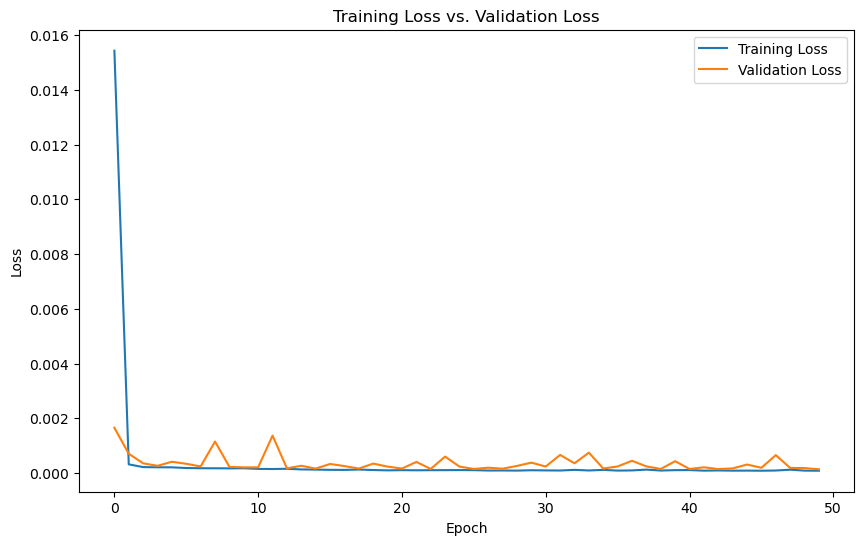

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred_actual = scaler.inverse_transform(train_pred)
train_actual = scaler.inverse_transform(y_train)
test_pred_actual = scaler.inverse_transform(test_pred)
test_actual = scaler.inverse_transform(y_test)

train_rmse = sqrt(mean_squared_error(train_actual, train_pred_actual))
train_mae = mean_absolute_error(train_actual, train_pred_actual)
train_mape = np.mean(np.abs((train_actual - train_pred_actual) / train_actual)) * 100

test_rmse = sqrt(mean_squared_error(test_actual, test_pred_actual))
test_mae = mean_absolute_error(test_actual, test_pred_actual)
test_mape = np.mean(np.abs((test_actual - test_pred_actual) / test_actual)) * 100

print('Train RMSE:', train_rmse)
print('Train MAE:', train_mae)
print('Train MAPE:', train_mape)
print('Test RMSE:', test_rmse)
print('Test MAE:', test_mae)
print('Test MAPE:', test_mape)

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Train RMSE: 1.1700879965005142
Train MAE: 0.7458235323853384
Train MAPE: 0.8413704948001591
Test RMSE: 1.884438472985049
Test MAE: 1.2964620058939338
Test MAPE: 1.0147001121158614


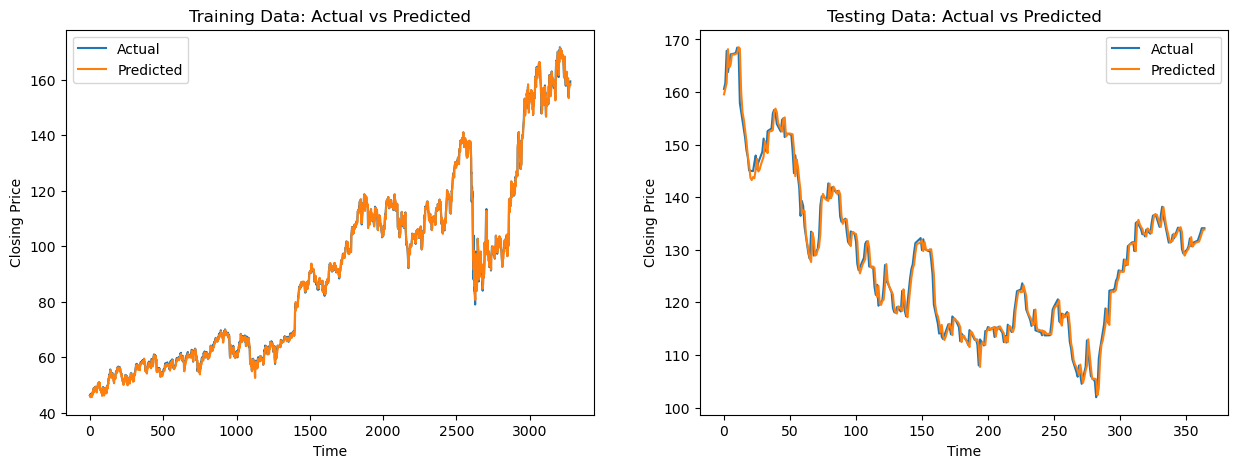

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_actual, label='Actual')
plt.plot(train_pred_actual, label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_actual, label='Actual')
plt.plot(test_pred_actual, label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.show()

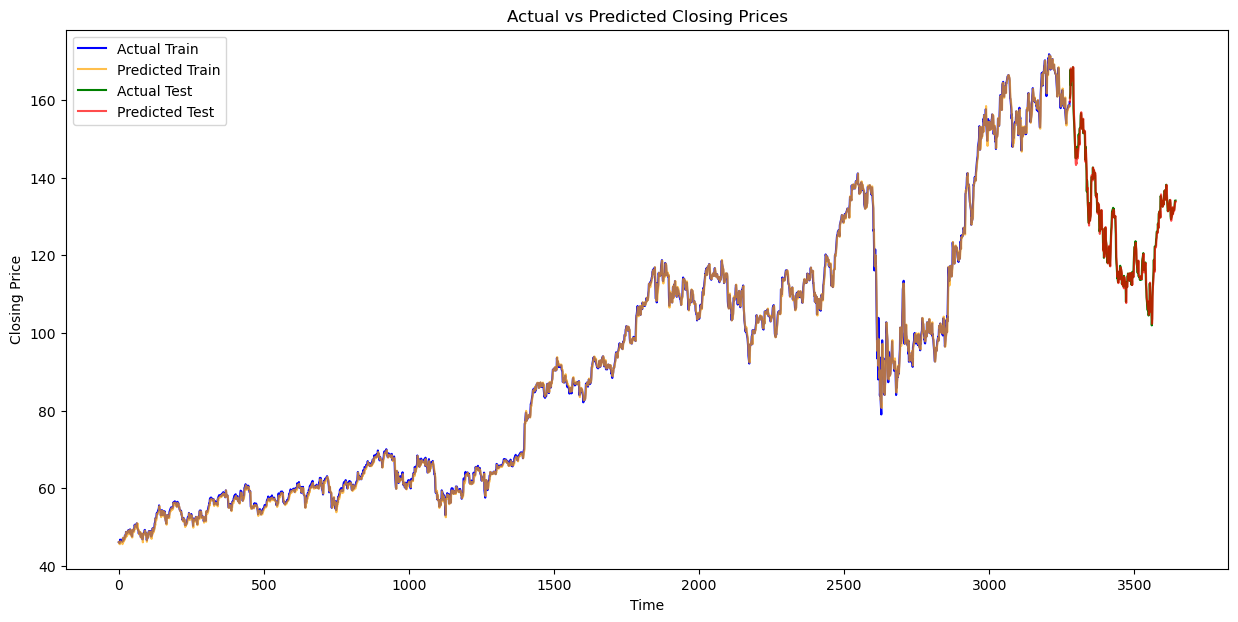

In [ ]:
import matplotlib.pyplot as plt

train_time = range(len(train_actual))
test_time = range(len(train_actual), len(train_actual) + len(test_actual))

plt.figure(figsize=(15, 7))
plt.plot(train_time, train_actual, label='Actual Train', color='blue')
plt.plot(train_time, train_pred_actual, label='Predicted Train', color='orange', alpha=0.7)
plt.plot(test_time, test_actual, label='Actual Test', color='green')
plt.plot(test_time, test_pred_actual, label='Predicted Test', color='red', alpha=0.7)

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()